
<style>
@media print {
  *,
  *:before,
  *:after {
    background: transparent !important;
    color: #000 !important;
    box-shadow: none !important;
    text-shadow: none !important;
  }

  a,
  a:visited {
    text-decoration: underline;
  }

  a[href]:after {
    content: " (" attr(href) ")";
  }

  abbr[title]:after {
    content: " (" attr(title) ")";
  }

  a[href^="#"]:after,
  a[href^="javascript:"]:after {
    content: "";
  }
  hr{
    border: 1px solid #555;
  }
  pre,
  blockquote {
    border: 1px solid #999;
    page-break-inside: avoid;
  }

  thead {
    display: table-header-group;
  }

  tr,
  img {
    page-break-inside: avoid;
  }

  img {
    max-width: 100% !important;
  }

  p,
  h2,
  h3 {
    orphans: 3;
    widows: 3;
  }

  h2,
  h3 {
    page-break-after: avoid;
  }
}

html {
  font-size: 12px;
}

@media screen and (min-width: 32rem) and (max-width: 48rem) {
  html {
    font-size: 15px;
  }
}

@media screen and (min-width: 48rem) {
  html {
    font-size: 16px;
  }
}

body {
  line-height: 1.85;
}

p,
.splendor-p {
  font-size: 1rem;
  margin-bottom: 1.3rem;
}

.rendered_html h1,
.rendered_html h2,
.rendered_html h3,
.rendered_html h4{
  margin: 0 0 1.5rem;
  line-height: 1;
}

.rendered_html h5,
.rendered_html h6{
  margin: 8px 0 40px;
}

.rendered_html h1 {
  margin-top: 0;
  font-size: 3.998rem;
}

.rendered_html h2{
  font-size: 2.827rem;
}

.rendered_html h3{
  font-size: 1.999rem;
}

.rendered_html h4 {
  font-size: 1.414rem;
}

.rendered_html h5 {

  font-size: 1.121rem;
}

.rendered_html h6{
  font-size: .88rem;
}

small,
.splendor-small {
  font-size: .707em;
}
hr{
  border-top: 1px solid #555;
}
/* https://github.com/mrmrs/fluidity */
.MathJax span {
    font-size: 19px;
}
img,
canvas,
iframe,
video,
svg,
select,
textarea {
  max-width: 100%;
}

@import url(http://fonts.googleapis.com/css?family=Merriweather:300italic,300);

html {
  font-size: 18px;
  max-width: 100%;
}

body {
  color: #444;
  font-family: 'Merriweather', Georgia, serif;
  margin: 0;
  max-width: 100%;
}

/* === A bit of a gross hack so we can have bleeding divs/blockquotes. */

div img {
  width: 100%;
}

blockquote p {
  font-size: 1.5rem;
  font-style: italic;
  margin: 1rem auto 1rem;
  max-width: 48rem;
}

li {
  margin-left: 2rem;
}

/* Counteract the specificity of the gross *:not() chain. */

h1 {
  padding: 0 0 !important;
}

/*  === End gross hack */

p {
  color: #555;
  height: auto;
  line-height: 1.45;
}

pre,
code {
  font-family: Menlo, Monaco, "Courier New", monospace;
}

pre {
  background-color: #fafafa;
  font-size: .8rem;
  overflow-x: scroll;
  padding: 1.125em;
}

a,
a:visited {
  color: #3498db;
}

a:hover,
a:focus,
a:active {
  color: #2980b9;
}

div.text.rendered_html table {
	display:block;
	width:100%;
	overflow:auto;
  border-spacing: 0;
  border-collapse: collapse;
  border: 0px;
}

.rendered_html table th {
	font-weight:600
}
.rendered_html  table th,.rendered_html table td {
	color:  #555;
  padding:6px 13px;
	border:1px solid #dfe2e5
}
.rendered_html table tr {
	background-color:#fff;
	border-top:1px solid #c6cbd1
}
.rendered_html table tr:nth-child(2n) {
	background-color:#f6f8fa
}
</style>

#### Introduccion a la teoria de la computacion

##### Taller #1 - Automatas finitos

**Me disculpo con el lector por el desorden en los diagramas**

$1.$Considere el problema de determinar si un código corresponde a un ISBN de 13 dígitos. Construya un autómata finito determinístico para identificar si un código es válido o no. Especifique formalmente el autómata, dibuje el diagrama y la tabla de transiciones. Implemente el autómata correspondiente utilizado una clase autómata.

Problema. Un codigo ISBN de 13 digitos se caracteriza por que el ultimo digito $r$ cumple que:

<p>$$r=(10-(x_1+x_2+x_3+x_4+x_5+x_6+x_7+x_8+x_9+x_{10}+x_{11}+x_{12}) \bmod 10)$$</p>



- - -
$2.$Construya un autómata finito determinístico sobre el alfabeto $\{a,b\}$ la cual acepte todas las cadenas que contengan NO más de dos ocurrencias consecutivas de la misma entrada (Por ejemplo, abba es aceptada y abbba no es aceptada). Especifique formalmente el autómata, dibuje el diagrama y la tabla de transiciones. 

Sea $\textbf{A}$ un AFD tal que:
$$A = (Q,\Sigma,\delta,q_0,F)$$

Se tiene que $\Sigma = \{a,b\}$, se considera a **1** como estado inicial, en este estado no se ha ingresado ningún símbolo, por lo tanto se tiene que no hay ninguna ocurrencia consecutiva y **1** es un estado final, después de leer un símbolo puede pasar a 2 estados, el estado **2** que recuerda que el símbolo **a** se ha leído una vez, y el estado **4** que recuerda que el símbolo **b** se ha leído una vez, en estos estados se sabe que solo se han leído **a** o **b** una vez, entonces estos son estados finales. Si se está en el estado **2** y se lee el símbolo **b** se sabe que solo se ha leído una vez entonces pasa al estado **4**, si se lee **a** estando en el estado **4** entonces pasaria a **2** por la misma razón. Ya con esto el autómata necesita recordar si un símbolo se ha leído de manera consecutiva por segunda vez, para esto se crea el estado **3** para recordar que se han leido 2 símbolos **a** consecutivos y el estado **5** para recordar que se han leido 2 símbolos **b** consecutivos. En cualquiera de estos 2 estados se cumple que solo hay 2 ocurrencias consecutivas de un símbolo. Entonces, estos estados son estados finales. Por último, se crea un estado **6** en el cual se sabe que se ha leído el mismo símbolo 3 veces consecutivas, Por lo cual este estado no es un estado final, si se llega a este estado no importa qué símbolo se lee después porque la cadena ya no es aceptada.

Formalmente el automata $\textbf{A}$ es:
$$ A = (\{1,2,3,4,5,6\},\{a,b\},\delta,1,\{1,2,3,4,5\})$$

Donde la función $\delta$ se representa por la siguiente tabla. 

|           | **a**   |  **b**  |
| --------- | ------- | ------- |
| &rarr;\*1 |    2    |    4    |
|   \*2     |    3    |    4    |
|   \*3     |    6    |    4    |
|   \*4     |    2    |    5    |
|   \*5     |    6    |    2    |
|   6       |    6    |    6    |
 

In [1]:
import networkx as nx
from nxpd import draw, nxpdParams #La libreria nxpd no viene por defecto

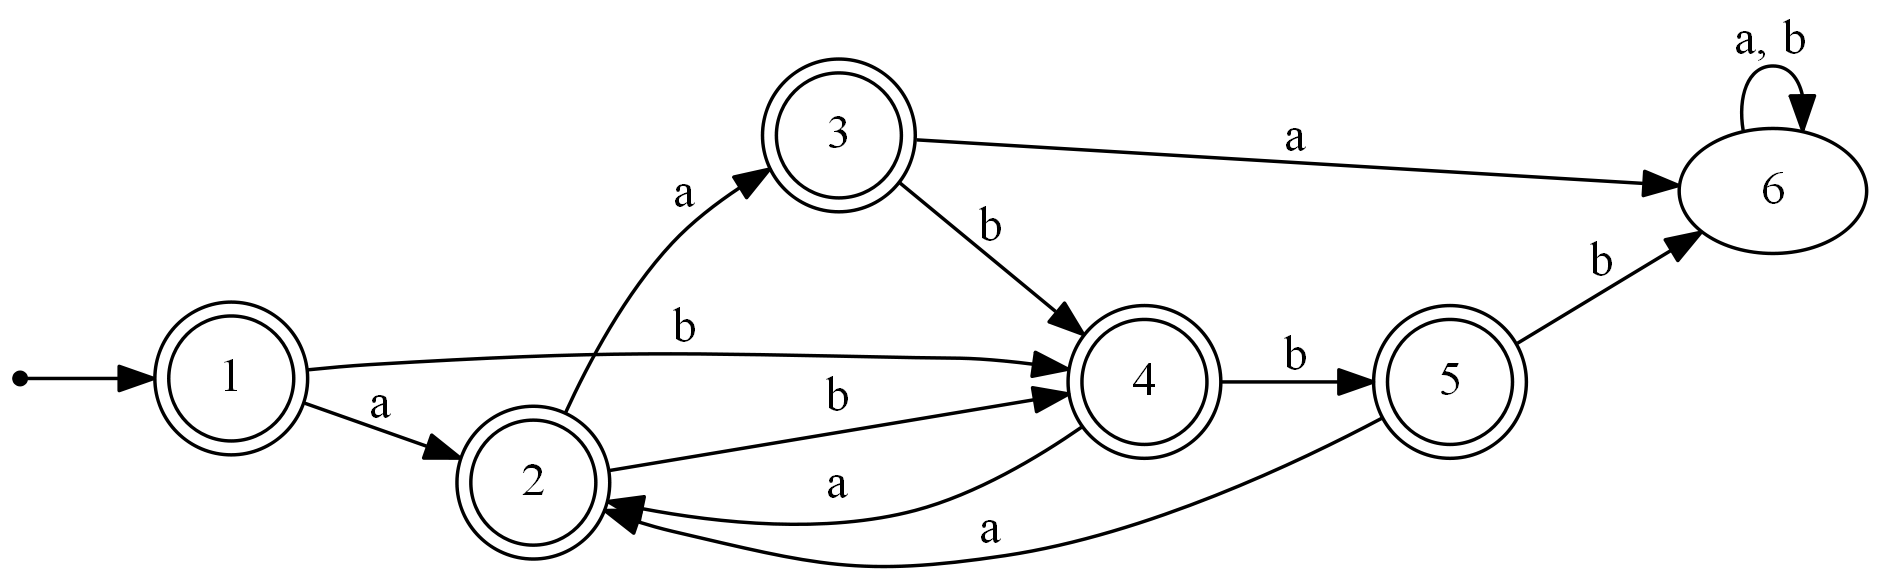

In [2]:
G = nx.DiGraph()
G.graph['rankdir'] = 'LR' #Left to Right
G.graph['dpi'] = 250 #(dots per inch) 
G.add_node(0, shape='point')
G.add_node(1, shape='doublecircle')
G.add_node(2, shape='doublecircle')
G.add_node(3, shape='doublecircle')
G.add_node(4, shape='doublecircle')
G.add_node(5, shape='doublecircle')
elist=[(0,1),(1,2,{'label':'a'}),(2,3,{'label':'a'}),(3,6,{'label':'a'})
       ,(1,4,{'label':'b'}),(4,5,{'label':'b'}),(5,6,{'label':'b'})
       ,(5,2,{'label':'a'}),(3,4,{'label':'b'}),(2,4,{'label':'b'})
       ,(4,2,{'label':'a'}),(6,6,{'label':'a, b'})]
G.add_edges_from(elist)
draw(G, show='ipynb')

- - -
$3.$Dado un autómata finito determinístico $\textbf{M}$, construya un nuevo autómata finito determinístico $\textbf{M}'$ con el mismo alfabeto de entrada y con la propiedad de que para todos los $w \in\Sigma^{*}$, $w$ es aceptado por $\textbf{M}'$ si y sólo si $w$ NO es aceptado por $\textbf{M}$.

Para un AFD $\textbf{M}$ cualquiera definido por la quíntupla $(Q,\Sigma,\delta,q_0,F)$ se puede considerar $L(M)$ como el lenguaje(el conjunto de todas las palabras) que acepta $\textbf{M}$, definida la función extendida $\delta^*(q, w)$, $L(M)$ se puede expresar de la forma:

<p>$$L(M) = \{w\ \mid\ \delta^*(q_{0}, w)\in F\} $$</p>

La expresión: "Para todos los $w \in\Sigma^{*}$, $w$ es aceptado por $\textbf{M}'$ si y sólo si $w$ no es aceptado por $\textbf{M}$" se podría expresar de la siguiente manera: 

<p>$$L(M') = \{w\ \mid\ \delta^*(q_{0}, w)\notin F\} $$ </p>

Como $w$ no llega a un estado final con la función extendida $\delta^*(q_0, w)$, se tiene que $w$ no es una palabra aceptada para $\textbf{M}$, pero si para $\textbf{M}'$. Para que $\textbf{M}'$ acepte palabras se deben especificar estados finales, como ya se sabe que una palabra $w$ es aceptada por $\textbf{M}'$ si está en cualquier estado que no esté contenido en F, el lenguaje de $\textbf{M}'$ se puede especificar como: 

<p>$$L(M') = \{w\ \mid\ \delta^*(q_{0}, w)\in Q-F\}$$ </p>

Aunque se haya obviado se tiene que tener en cuenta que la función $\delta^*$ y por lo tanto la función $\delta$, el estado $q_0$ y el conjunto de estados $Q$ usados para definir el lenguaje $L(M')$ son del autómata inicial $\textbf{M}$. Ya especificado esto se puede definir a $\textbf{M}'$ como:

<p>$$M' = (Q,\Sigma,\delta,q_0,Q-F)$$</p>

- - -
$4.$Dados dos autómatas finitos determinísticos $\textbf{M}_{\textbf{1}}$ y $\textbf{M}_{\textbf{2}}$ con el mismo alfabeto de entrada, construya un tercer autómata finito determinísticos $\textbf{M}$ con la propiedad que $w \in\Sigma^{*}$ es aceptado por M si y sólo si es aceptado por ambos $\textbf{M}_{\textbf{1}}$ y $\textbf{M}_{\textbf{2}}$.

Se definen $\textbf{M}_{\textbf{1}}$ y $\textbf{M}_{\textbf{2}}$ con:
$$M_1 = (Q_1,\Sigma,\delta_1,q^1_0,F_1)$$

<p>  $$M_2 = (Q_2,\Sigma,\delta_2,q^2_0,F_2)$$   </p>

Se considera el autómata producto $\textbf{M} = (Q,\Sigma^*,\delta,q_0,F)$ que resulta de los autómatas $\textbf{M}_{\textbf{1}}$ y $\textbf{M}_{\textbf{2}}$, lo primero en tener en cuenta es el alfabeto $\Sigma*$ de $M$, este se calcula como la unión de los alfabetos de los 2 autómatas del que fue creado $M$, pero, en este caso los alfabetos de los 2 autómatas son iguales, por lo tanto, $\Sigma^* = \Sigma$. 

Los estados $Q$ del autómata $M$ es el resultado del producto cruz de $Q_1$ y $Q_2$, es decir, los estados de $\textbf{M}$ se expresan como: 

<p>$$ Q = \{(q^1,q^2) \mid q^1 \in Q_1\ \ y\ \ q^2 \in Q_2\}$$</p>

Ya definido el alfabeto y los estados, se define la funcion de transicion $\delta$ con un estado $(q, r)$ que cumpla $q \in Q_1$ y $r \in Q_2$ y un símbolo $a$ cualquiera como:
$$\delta((q, r),a) = (\delta_1(q,a),\delta_2(r,a))$$
El estado inicial se define facilmente como: 
$$q_0 = (q^1_0,q^2_0)$$

Finalmente se define el conjunto de estados finales $F$ como $F = \{(q^1,q^2)\ \mid\ q^1 \in F_1\ \ y\ \ q^2 \in F_2\}$, lo anterior hace para que si una palabra $w$ es aceptada por un solo autómata, el autómata $M$ no acepte a $w$, el autómata solo aceptará si los 2 autómatas aceptan $w$. 

- - -
$5.$Construya un autómata finito no determinístico que permita aceptar palabras sobre el alfabeto $\{1,2,3\}$ tal que el último símbolo aparezca al menos dos veces, pero sin la intervención de un símbolo superior en la mitad. Por ejemplo: 11, 2112, 123113, 3212113, etc.

Se define a $M$ como:
$$M = (\{a, b, c, d, e\}, \{1,2,3\}, \delta, a,{e})$$

$a$ es el estado inicial, dependiendo de que entre pasa a los estados $b$, $c$ o $d$. Con el estado $b$ se conjetura que se la cadena termina en $1$ y no hay ningun simbolo superior en el medio. Con $b$ se conjetura que la cadena termina en $2$ y solo hay símbolos de $1$ o $2$. El estado $3$ conjetura que la cadena termina con $3$ y si la conjetura de cada estado es verdadera entonces la palabra $w$ que se ha ingresado, es una palabra válida. Si la conjetura no es verdadera entonces puede que la conjetura de otro hilo si y $w$ es una palabra válida o puede que $w$ no sea válida y todos los hilos mueran.

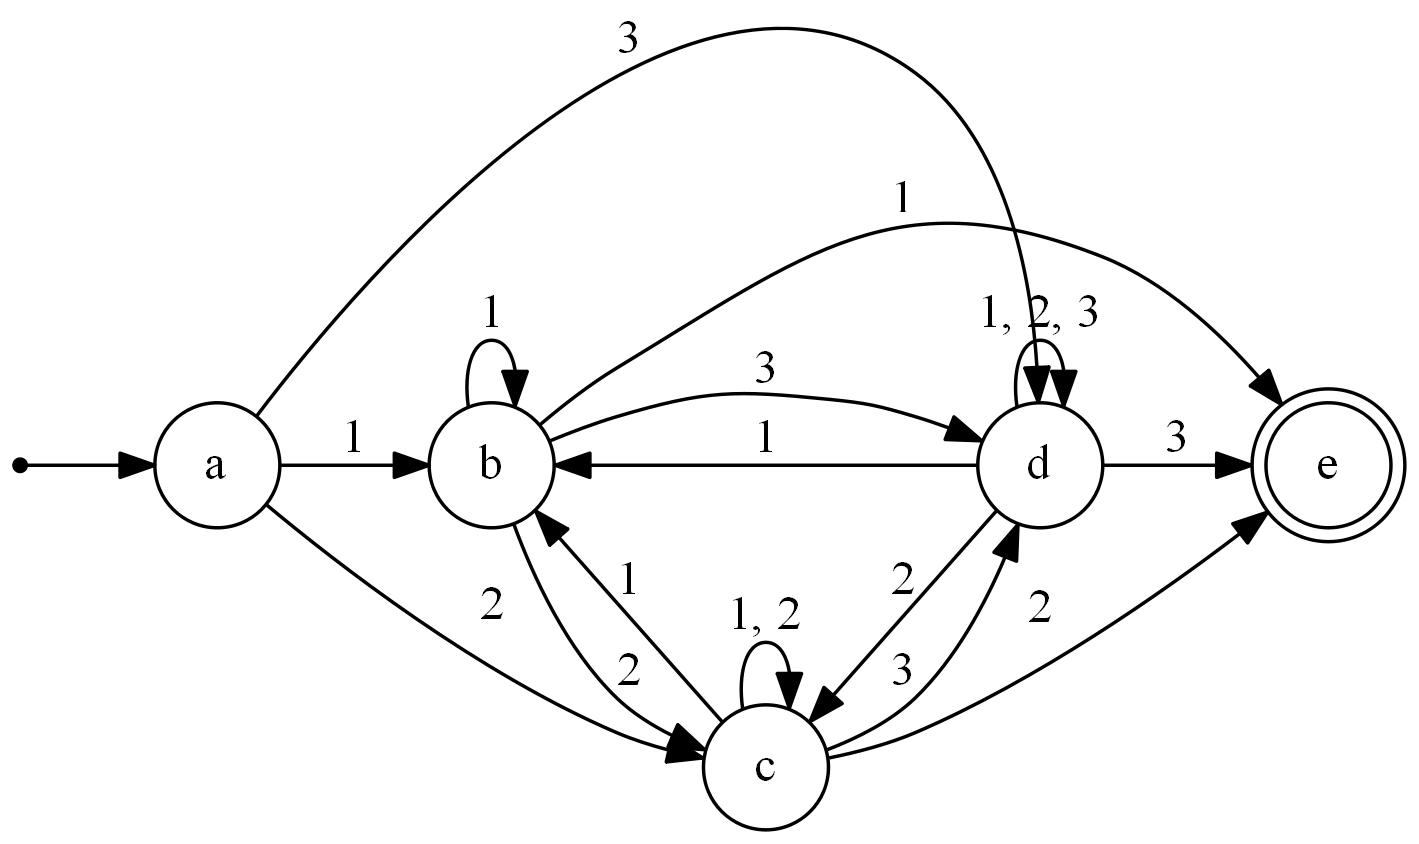

In [3]:
G = nx.DiGraph()
G.graph['rankdir'] = 'LR' #Left to Right
G.graph['dpi'] = 250 #(dots per inch) 
G.add_node(0, shape='point')
G.add_node(1, label='a', shape='circle')
G.add_node(2, label='b', shape='circle')
G.add_node(3, label='c', shape='circle')
G.add_node(4, label='d', shape='circle')
G.add_node(5, label='e', shape='doublecircle')
elist=[(0,1),(1,2,{'label':1}),(1,3,{'label':2}),(1,4,{'label':3})
       ,(2,2,{'label':1}),(3,3,{'label':'1, 2'}),(4,4,{'label':'1, 2, 3'})
       ,(2,3,{'label':2}),(3,2,{'label':1}),(3,4,{'label':3})
       ,(4,3,{'label':2}),(4,2,{'label':1}),(2,4,{'label':3})
       ,(2,5,{'label':1}),(3,5,{'label':2}),(4,5,{'label':3})]
G.add_edges_from(elist)
draw(G, show='ipynb')

- - -
$6.$Escriba un autómata que reconozca todos las cadenas sobre $\{0 ,1\}$ que representan números binarios que son divisibles por 5. Por ejemplo, 0, 101, 1010, 1111, 11001. 

Para construir la lógica del autómata se usará la aritmética modular, esta nos dice que sea $x$ un número cualquiera si $x\bmod 5 = 0$, entonces $x$ es divisible por 5. Si x no es divisible por 5, entonces $x\bmod 5 \in \{1, 2, 3, 4\}$.Con lo anterior y $a, n, x \in \mathbb{Z}$ y $x\bmod 5 = a$, entonces $x$ se puede expresar como $ x = 5n + a$.

Ya sabiendo lo anterior se sabe que no importa que número entero se tome, si se hace modulo 5 a este número el resultado estará en $\{0, 1, 2, 3, 4\}$, estos son los estados de nuestro autómata $M$, cambiando los números por letras para evitar confusión, diremos que los estados $Q$ de nuestro autómata son $Q = {a, b, c, d, e, Z}$. El estado Z es un estado que se añade para que no se reconozca a $\varepsilon$ como múltiplo de 5.

Sea $n$ el número que representa la cadena binaria $N$ que ha leído el autómata $M$, si se ingresa un $0$, entonces $n=2n$. En caso de que se ingrese un $1$ , entonces $n=2n+1$. Con esto construiremos una tabla donde dado el módulo del $N$ actual, si se ingresa un simbolo cual seria el modulo del $Na$, Aquí se toma $a$ como el símbolo a ingresar, como estos representan números en binario, estos son los números que usaremos para hacer las operaciones.

|$n\bmod5$ |$(2n)\bmod 5$ | $(2n+1)\bmod 5$|
| :------: | :----------: | :------------: |
| 0 | 0 | 1 |
| 1 | 2 | 3 |
| 2 | 4 | 0 |
| 3 | 1 | 2 |
| 4 | 3 | 4 |

Si cambiamos los dígitos por los estados ya establecidos y agregamos Z tendríamos:

|       |  $0$  |  $1$  |
| :---: | :---: | :---: |
| &rarr;Z | a | b |
| \*a | a | b |
| b | c | d |
| c | e | a |
| d | b | c |
| e | d | e |

Esta es la tabla de transiciones que define a $\delta$ y con ella se define el estado inicial $Z$ y el estado final $a$.

Con todo esto se puede definir formalmente el autómata $M$ como:
$$M = (\{a, b, c, d, e, Z\}, \{0, 1\}, \delta, Z,{a})$$

- - -
$7.$Un sistema de transiciones es una generalización de los autómata finito no
determinísticos con $\varepsilon$-transiciones, en la cual se admiten transiciones adicionales con
palabras de longitud mayor o igual a 1. De una definición formal de los sistemas de
transiciones, y pruebe que los lenguajes aceptados por un sistema de transiciones son
aceptados por un DFA.


- - -
$8.$Pruebe o desapruebe la siguiente afirmación: El siguiente autómata acepta el lenguaje: $$L = \{ w \mid w = a^ib^j o w = a^ic^j, i \geq 1, j\geq1\}$$

Formalmente el autómata $A$ se definiría como $A = (\{1,2,3,4,5,6\},\{a,b,c\},\delta,1,\{3\})$ siendo $\delta$ la función descrita por la siguiente tabla: 

|       |  $a$  |  $b$  |  $c$  |
| :---: | :---: | :---: | :---: |
| &rarr;$1$ | $\{2,6\}$ | $\{4\}$ | $\{4\}$ |
| $2$ | $\{2\}$ | $\{3\}$ | $\{4\}$ |
| \*$3$ | $\{4\}$ | $\{3\}$ | $\{4\}$ |
| $4$ | $\{4\}$ | $\{4\}$ | $\{4\}$ |
| $5$ | $\{4\}$ | $\{4\}$ | $\{5\}$ |
| $6$ | $\{6\}$ | $\{4\}$ | $\{5\}$ |

Por definición se tiene que $L = \{w\ \mid\ \delta^*(1, w)\cap \{3\} \not= \emptyset\}$

Se considera a $w = "ac"$ y se evalua $\delta^*(1, w)$:

>$1. \delta^*(1, \varepsilon) = \{1\}\\2. \delta^*(1, a) = \delta(1, a) = \{2,6\}\\3. \delta^*(1, ac) = \delta(2, c) \cup \delta(6, c) = \{4,5\}$

Como $\delta^*(1, ac) = \{4,5\}\ y\ \{4,5\} \cap \{3\} = \emptyset$ se dice que la palabra "ac" no es aceptada por $A$, por lo tanto  $A$ no acepta el lenguaje $L = \{ w \mid w = a^ib^j o w = a^ic^j, i \geq 1, j\geq1\}$.


##### Jesus Felipe Chavarro Muñoz